In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [198]:
df = pd.read_csv('dataset/Apartment_Building_Dataset.csv')
df

,ID,EHR_kood,TaisAadress,Maakond,KOV,KOV_voi_LinnaOsa,Tänav_Hoone_Nr,Esmane_Kasutuselevotu_Aasta,Ajastu,Hooneosade_Arv,Hooneosade_Arv_Normaliseeritud,Ruumide_Arv,Maksimaalne_Korruste_Arv,Korterite arv trepikojas,Liftid,Trepikodade_Arv,MaaAluste_Korruste_Arv,Korgus,Korgus_Umardatud,Laius,Pikkus,EhitusAlune_Pindala,Suletud_Netopindala,Building_Common_Area,Heated_Area,Välisseina_liik,Valisnurkade Arva,Sisenurkade Arv,Katusekatte materjal,Soojusvarustuse liik,Lamekatus_0/1,kahepoolne_kaldkatus_0/1,ühepoole_kaldkatus_0/1,Lodzad_0/1,Rõdud_0/1,Otstes aknad_0/1,Energy_Certificate_Class,Asein_märgis,Aaken_märgis
0,137,101024258,"Harju maakond, Tallinn, Põhja-Tallinna linnaos...",Harju maakond,Tallinn,Põhja-Tallinna linnaosa,Kanepi tn 7,1959,1951-1960,8,10,36,2,2,0,2,1,12.8,13.0,11.5,26.0,270.0,547.7,161.6,386.1,tellis,4,0,NaN,'kohtküte',0,1,0,0,0,1.0,E,290.9,61.0
1,139,101019047,"Harju maakond, Tallinn, Lasnamäe linnaosa, Pal...",Harju maakond,Tallinn,Lasnamäe linnaosa,Pallasti tn 3/2,1900,...-1900,5,10,16,2,1,0,2,1,10.4,10.5,6.8,16.8,110.0,213.2,41.6,162.0,tellis,5,1,'plekk','kohtküte',1,0,0,0,1,0.0,F,2011.0,479.0
2,290,101040360,"Harju maakond, Tallinn, Kesklinna linnaosa, A....",Harju maakond,Tallinn,Kesklinna linnaosa,A. Weizenbergi tn 12a,1912,1911-1920,5,10,29,2,1,0,2,1,12.4,12.5,11.4,23.2,247.0,626.1,111.7,586.0,puit,4,0,'plekk','kohtküte',0,1,0,0,0,1.0,E,463.7,99.4
3,258,101040716,"Harju maakond, Tallinn, Kristiine linnaosa, Vä...",Harju maakond,Tallinn,Kristiine linnaosa,Västriku tn 2c,1972,1971-1980,8,10,39,4,2,0,1,1,14.6,14.5,12.4,18.6,257.0,729.6,186.6,595.7,tellis,6,2,'bituumen või PVC plaat või rullmaterjal',"'kaugküte', 'lokaalküte'",1,0,0,1,0,1.0,E,421.2,122.2
4,35,108029467,"Lääne-Viru maakond, Rakvere vald, Sõmeru alevi...",Lääne-Viru maakond,Rakvere vald,Sõmeru alevik,Puiestee tn 8,1969,1961-1970,8,10,36,2,2,0,2,1,12.8,13.0,13.0,49.8,270.0,585.9,205.8,380.1,tellis,6,4,'eterniit','kohtküte',0,1,0,0,0,0.0,E,275.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,271,101021129,"Harju maakond, Tallinn, Kristiine linnaosa, Ki...",Harju maakond,Tallinn,Kristiine linnaosa,Kirsi tn 8,1974,1971-1980,143,140,609,9,4,4,4,1,29.4,29.5,NaN,NaN,1178.0,9354.9,1871.6,8193.6,suurpaneel,12,8,'bituumen või PVC plaat või rullmaterjal','kaugküte',1,0,0,1,0,0.0,C,4023.7,1477.3
382,194,101027441,"Harju maakond, Tallinn, Haabersti linnaosa, Õi...",Harju maakond,Tallinn,Haabersti linnaosa,Õismäe tee 78,1975,1971-1980,144,140,612,9,4,4,4,1,29.4,29.5,NaN,NaN,1187.0,9540.4,1858.8,8680.0,suurpaneel,4,0,'bituumen või PVC plaat või rullmaterjal','kaugküte',1,0,0,0,0,0.0,E,0.0,0.0
383,148,104017436,"Tartu maakond, Tartu linn, Tartu linn, Anne tn 59",Tartu maakond,Tartu linn,Tartu linn,Anne tn 59,1972,1971-1980,144,140,649,9,4,4,4,1,26.8,27.0,NaN,NaN,1139.0,9633.3,1186.7,8024.0,suurpaneel,4,0,'bituumen või PVC plaat või rullmaterjal','kaugküte',1,0,0,1,1,1.0,C,0.0,0.0
384,276,101010583,"Harju maakond, Tallinn, Mustamäe linnaosa, A. ...",Harju maakond,Tallinn,Mustamäe linnaosa,A. H. Tammsaare tee 131,1972,1971-1980,162,160,756,9,4,5,5,0,32.4,32.5,NaN,NaN,1534.0,11304.8,1747.5,12298.4,tellis,4,0,'bituumen või PVC plaat või rullmaterjal','kaugküte',1,0,0,0,1,1.0,C,5147.0,2384.6


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              386 non-null    int64  
 1   EHR_kood                        386 non-null    int64  
 2   TaisAadress                     386 non-null    object 
 3   Maakond                         386 non-null    object 
 4   KOV                             386 non-null    object 
 5   KOV_voi_LinnaOsa                386 non-null    object 
 6   Tänav_Hoone_Nr                  386 non-null    object 
 7   Esmane_Kasutuselevotu_Aasta     386 non-null    int64  
 8   Ajastu                          386 non-null    object 
 9   Hooneosade_Arv                  386 non-null    int64  
 10  Hooneosade_Arv_Normaliseeritud  386 non-null    int64  
 11  Ruumide_Arv                     386 non-null    int64  
 12  Maksimaalne_Korruste_Arv        386 

In [200]:
# Drop unnecessary columns
unnecessary_columns = ['ID', 'TaisAadress', 'Maakond', 'KOV', 'KOV_voi_LinnaOsa', 'Tänav_Hoone_Nr', 'Hooneosade_Arv']
df_cleaned = df.drop(columns=unnecessary_columns)
df_cleaned.head()

,EHR_kood,Esmane_Kasutuselevotu_Aasta,Ajastu,Hooneosade_Arv_Normaliseeritud,Ruumide_Arv,Maksimaalne_Korruste_Arv,Korterite arv trepikojas,Liftid,Trepikodade_Arv,MaaAluste_Korruste_Arv,Korgus,Korgus_Umardatud,Laius,Pikkus,EhitusAlune_Pindala,Suletud_Netopindala,Building_Common_Area,Heated_Area,Välisseina_liik,Valisnurkade Arva,Sisenurkade Arv,Katusekatte materjal,Soojusvarustuse liik,Lamekatus_0/1,kahepoolne_kaldkatus_0/1,ühepoole_kaldkatus_0/1,Lodzad_0/1,Rõdud_0/1,Otstes aknad_0/1,Energy_Certificate_Class,Asein_märgis,Aaken_märgis
0,101024258,1959,1951-1960,10,36,2,2,0,2,1,12.8,13.0,11.5,26.0,270.0,547.7,161.6,386.1,tellis,4,0,NaN,'kohtküte',0,1,0,0,0,1.0,E,290.9,61.0
1,101019047,1900,...-1900,10,16,2,1,0,2,1,10.4,10.5,6.8,16.8,110.0,213.2,41.6,162.0,tellis,5,1,'plekk','kohtküte',1,0,0,0,1,0.0,F,2011.0,479.0
2,101040360,1912,1911-1920,10,29,2,1,0,2,1,12.4,12.5,11.4,23.2,247.0,626.1,111.7,586.0,puit,4,0,'plekk','kohtküte',0,1,0,0,0,1.0,E,463.7,99.4
3,101040716,1972,1971-1980,10,39,4,2,0,1,1,14.6,14.5,12.4,18.6,257.0,729.6,186.6,595.7,tellis,6,2,'bituumen või PVC plaat või rullmaterjal',"'kaugküte', 'lokaalküte'",1,0,0,1,0,1.0,E,421.2,122.2
4,108029467,1969,1961-1970,10,36,2,2,0,2,1,12.8,13.0,13.0,49.8,270.0,585.9,205.8,380.1,tellis,6,4,'eterniit','kohtküte',0,1,0,0,0,0.0,E,275.0,82.0


In [201]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-adjust width 

# Now display your DataFrame
df_cleaned.head()

,EHR_kood,Esmane_Kasutuselevotu_Aasta,Ajastu,Hooneosade_Arv_Normaliseeritud,Ruumide_Arv,Maksimaalne_Korruste_Arv,Korterite arv trepikojas,Liftid,Trepikodade_Arv,MaaAluste_Korruste_Arv,Korgus,Korgus_Umardatud,Laius,Pikkus,EhitusAlune_Pindala,Suletud_Netopindala,Building_Common_Area,Heated_Area,Välisseina_liik,Valisnurkade Arva,Sisenurkade Arv,Katusekatte materjal,Soojusvarustuse liik,Lamekatus_0/1,kahepoolne_kaldkatus_0/1,ühepoole_kaldkatus_0/1,Lodzad_0/1,Rõdud_0/1,Otstes aknad_0/1,Energy_Certificate_Class,Asein_märgis,Aaken_märgis
0,101024258,1959,1951-1960,10,36,2,2,0,2,1,12.8,13.0,11.5,26.0,270.0,547.7,161.6,386.1,tellis,4,0,NaN,'kohtküte',0,1,0,0,0,1.0,E,290.9,61.0
1,101019047,1900,...-1900,10,16,2,1,0,2,1,10.4,10.5,6.8,16.8,110.0,213.2,41.6,162.0,tellis,5,1,'plekk','kohtküte',1,0,0,0,1,0.0,F,2011.0,479.0
2,101040360,1912,1911-1920,10,29,2,1,0,2,1,12.4,12.5,11.4,23.2,247.0,626.1,111.7,586.0,puit,4,0,'plekk','kohtküte',0,1,0,0,0,1.0,E,463.7,99.4
3,101040716,1972,1971-1980,10,39,4,2,0,1,1,14.6,14.5,12.4,18.6,257.0,729.6,186.6,595.7,tellis,6,2,'bituumen või PVC plaat või rullmaterjal',"'kaugküte', 'lokaalküte'",1,0,0,1,0,1.0,E,421.2,122.2
4,108029467,1969,1961-1970,10,36,2,2,0,2,1,12.8,13.0,13.0,49.8,270.0,585.9,205.8,380.1,tellis,6,4,'eterniit','kohtküte',0,1,0,0,0,0.0,E,275.0,82.0


In [202]:
df_cleaned["Soojusvarustuse liik"].value_counts()

Soojusvarustuse liik
'kaugküte'                              286
'lokaalküte'                             33
'kaugküte', 'lokaalküte'                 18
'kohtküte'                               14
'kaugküte', 'kohtküte'                    9
'lokaalküte', 'kaugküte'                  8
'kohtküte', 'kaugküte'                    6
'kohtküte', 'lokaalküte'                  5
'lokaalküte', 'kohtküte'                  3
'kaugküte', 'muu'                         3
'kohtküte', 'kaugküte', 'lokaalküte'      1
Name: count, dtype: int64

In [203]:
df_cleaned["Välisseina_liik"].value_counts()

Välisseina_liik
tellis               139
suurplokk            105
suurpaneel            72
väikepaneel           46
väikeplokk            11
puit                   9
tellis/väikeplokk      2
tuhaplokk              2
Name: count, dtype: int64

In [204]:
df_cleaned["Katusekatte materjal"].value_counts()

Katusekatte materjal
'bituumen või  PVC  plaat või rullmaterjal'                   220
'plekk'                                                        75
'eterniit'                                                     37
'plaatmaterjal (seal hulgas tsementkiudplaat)'                 24
'muu'                                                           8
'katusekivi'                                                    3
'eterniit', 'plekk'                                             3
'muu', 'bituumen või  PVC  plaat või rullmaterjal'              3
'muu', 'plekk'                                                  2
'info puudub'                                                   1
'plaatmaterjal (seal hulgas tsementkiudplaat)', 'plekk'         1
'eterniit', 'plaatmaterjal (seal hulgas tsementkiudplaat)'      1
'bituumen või  PVC  plaat või rullmaterjal', 'muu'              1
'bituumen või  PVC  plaat või rullmaterjal', 'plekk'            1
'plaatmaterjal (seal hulgas tsementkiudplaat)', 'muu'  

In [205]:
df_cleaned["Ajastu"].value_counts()

Ajastu
1971-1980    129
1981-1990    111
1961-1970     97
1951-1960     22
1991-2000     14
1931-1940      4
1911-1920      3
1921-1930      3
1941-1950      2
...-1900       1
Name: count, dtype: int64

In [206]:
# Check the exact type of the 'Ajastu' column
print(f"Data type of Ajastu: {type(df_cleaned['Ajastu'].iloc[0])}")
print(f"DataFrame reported dtype: {df_cleaned['Ajastu'].dtype}")

# Examine a few values from this column
print("\nSample values:")
print(df_cleaned['Ajastu'].head())

# Try to convert explicitly to see if it works
try:
    df_cleaned['Ajastu'].astype(float)
    print("\nConverts to float successfully")
except ValueError as e:
    print(f"\nConversion error: {e}")

# Check if the values look like numbers but are actually strings
print("\nChecking if values are numeric or string representations:")
for val in df_cleaned['Ajastu'].unique()[:5]:  # Check first 5 unique values
    print(f"Value: {val}, Type: {type(val)}, Is digit: {str(val).isdigit() if isinstance(val, str) else 'N/A'}")

Data type of Ajastu: <class 'str'>
DataFrame reported dtype: object

Sample values:
0    1951-1960
1     ...-1900
2    1911-1920
3    1971-1980
4    1961-1970
Name: Ajastu, dtype: object

Conversion error: could not convert string to float: '1951-1960'

Checking if values are numeric or string representations:
Value: 1951-1960, Type: <class 'str'>, Is digit: False
Value: ...-1900, Type: <class 'str'>, Is digit: False
Value: 1911-1920, Type: <class 'str'>, Is digit: False
Value: 1971-1980, Type: <class 'str'>, Is digit: False
Value: 1961-1970, Type: <class 'str'>, Is digit: False


In [207]:
df_cleaned["Energy_Certificate_Class"].value_counts()

Energy_Certificate_Class
C    146
D     80
B     65
E     42
A     29
F     11
G      5
Name: count, dtype: int64

In [208]:
era_mapping = {
    '...-1900': 1,
    '1911-1920': 2,
    '1921-1930': 3,
    '1931-1940': 4,
    '1941-1950': 5,
    '1951-1960': 6,
    '1961-1970': 7,
    '1971-1980': 8,
    '1981-1990': 9,
    '1991-2000': 10
}

# Apply the mapping to your data
df_cleaned['Ajastu_encoded'] = df_cleaned['Ajastu'].map(era_mapping)

# Drop the original string column
df_cleaned = df_cleaned.drop('Ajastu', axis=1)

In [209]:
# One-hot encode the categorical variables with appropriate prefixes
df_encoded = pd.get_dummies(df_cleaned, 
                           columns=['Soojusvarustuse liik', 'Välisseina_liik', 'Katusekatte materjal'], 
                           prefix=['heating', 'wall', 'roof'])
df_encoded

,EHR_kood,Esmane_Kasutuselevotu_Aasta,Hooneosade_Arv_Normaliseeritud,Ruumide_Arv,Maksimaalne_Korruste_Arv,Korterite arv trepikojas,Liftid,Trepikodade_Arv,MaaAluste_Korruste_Arv,Korgus,Korgus_Umardatud,Laius,Pikkus,EhitusAlune_Pindala,Suletud_Netopindala,Building_Common_Area,Heated_Area,Valisnurkade Arva,Sisenurkade Arv,Lamekatus_0/1,kahepoolne_kaldkatus_0/1,ühepoole_kaldkatus_0/1,Lodzad_0/1,Rõdud_0/1,Otstes aknad_0/1,Energy_Certificate_Class,Asein_märgis,Aaken_märgis,Ajastu_encoded,heating_'kaugküte',"heating_'kaugküte', 'kohtküte'","heating_'kaugküte', 'lokaalküte'","heating_'kaugküte', 'muu'",heating_'kohtküte',"heating_'kohtküte', 'kaugküte'","heating_'kohtküte', 'kaugküte', 'lokaalküte'","heating_'kohtküte', 'lokaalküte'",heating_'lokaalküte',"heating_'lokaalküte', 'kaugküte'","heating_'lokaalküte', 'kohtküte'",wall_puit,wall_suurpaneel,wall_suurplokk,wall_tellis,wall_tellis/väikeplokk,wall_tuhaplokk,wall_väikepaneel,wall_väikeplokk,roof_'bituumen või PVC plaat või rullmaterjal',"roof_'bituumen või PVC plaat või rullmaterjal', 'muu'","roof_'bituumen või PVC plaat või rullmaterjal', 'plekk'",roof_'eterniit',"roof_'eterniit', 'plaatmaterjal (seal hulgas tsementkiudplaat)'","roof_'eterniit', 'plekk'",roof_'info puudub',roof_'katusekivi',roof_'muu',"roof_'muu', 'bituumen või PVC plaat või rullmaterjal'","roof_'muu', 'plekk'",roof_'plaatmaterjal (seal hulgas tsementkiudplaat)',"roof_'plaatmaterjal (seal hulgas tsementkiudplaat)', 'muu'","roof_'plaatmaterjal (seal hulgas tsementkiudplaat)', 'plekk'",roof_'plekk'
0,101024258,1959,10,36,2,2,0,2,1,12.8,13.0,11.5,26.0,270.0,547.7,161.6,386.1,4,0,0,1,0,0,0,1.0,E,290.9,61.0,6,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,101019047,1900,10,16,2,1,0,2,1,10.4,10.5,6.8,16.8,110.0,213.2,41.6,162.0,5,1,1,0,0,0,1,0.0,F,2011.0,479.0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,101040360,1912,10,29,2,1,0,2,1,12.4,12.5,11.4,23.2,247.0,626.1,111.7,586.0,4,0,0,1,0,0,0,1.0,E,463.7,99.4,2,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,101040716,1972,10,39,4,2,0,1,1,14.6,14.5,12.4,18.6,257.0,729.6,186.6,595.7,6,2,1,0,0,1,0,1.0,E,421.2,122.2,8,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,108029467,1969,10,36,2,2,0,2,1,12.8,13.0,13.0,49.8,270.0,585.9,205.8,380.1,6,4,0,1,0,0,0,0.0,E,275.0,82.0,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,101021129,1974,140,609,9,4,4,4,1,29.4,29.5,NaN,NaN,1178.0,9354.9,1871.6,8193.6,12,8,1,0,0,1,0,0.0,C,4023.7,1477.3,8,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
382,101027441,1975,140,612,9,4,4,4,1,29.4,29.5,NaN,NaN,1187.0,9540.4,1858.8,8680.0,4,0,1,0,0,0,0,0.0,E,0.0,0.0,8,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
383,104017436,19

In [210]:
# Handle missing values for numeric columns
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].mean())

# Handle missing values for categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
df_encoded[categorical_cols] = df_encoded[categorical_cols].fillna('Unknown')

# Verify if there are any remaining missing values
print(df_encoded.isnull().sum())

EHR_kood                                                        0
Esmane_Kasutuselevotu_Aasta                                     0
Hooneosade_Arv_Normaliseeritud                                  0
Ruumide_Arv                                                     0
Maksimaalne_Korruste_Arv                                        0
                                                               ..
roof_'muu', 'plekk'                                             0
roof_'plaatmaterjal (seal hulgas tsementkiudplaat)'             0
roof_'plaatmaterjal (seal hulgas tsementkiudplaat)', 'muu'      0
roof_'plaatmaterjal (seal hulgas tsementkiudplaat)', 'plekk'    0
roof_'plekk'                                                    0
Length: 63, dtype: int64


In [211]:
# Split data
X = df_encoded.drop('Energy_Certificate_Class', axis=1)
y = df_encoded['Energy_Certificate_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- Training Random Forest ---
Accuracy: 0.3718
RMSE: 1.6132

Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.40      0.44         5
           B       0.40      0.18      0.25        11
           C       0.43      0.58      0.49        31
           D       0.24      0.27      0.25        15
           E       0.38      0.27      0.32        11
           F       0.00      0.00      0.00         0
           G       0.00      0.00      0.00         1
     Unknown       0.00      0.00      0.00         4

    accuracy                           0.37        78
   macro avg       0.24      0.21      0.22        78
weighted avg       0.36      0.37      0.35        78



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

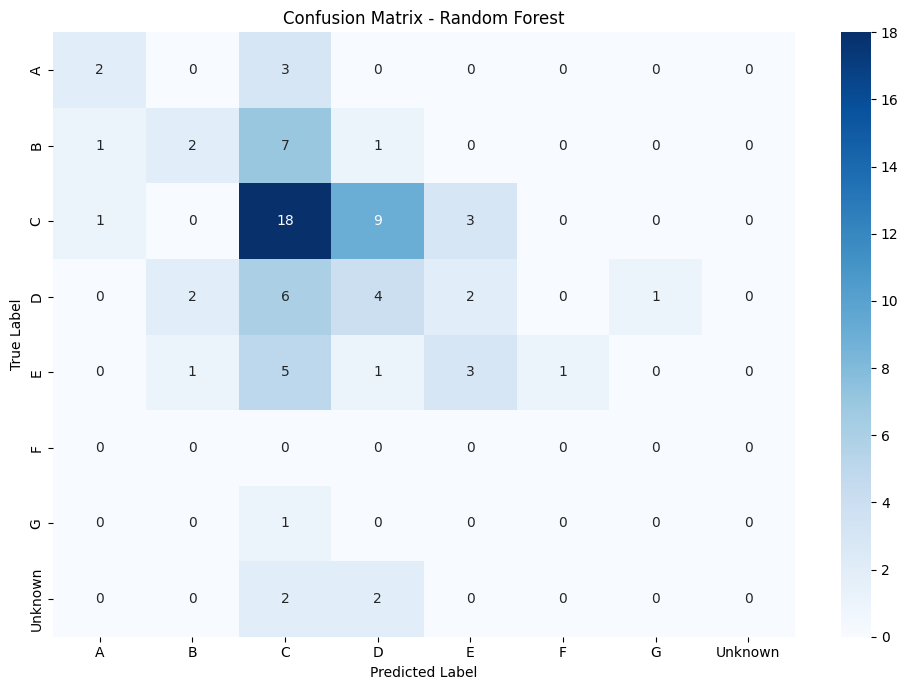


--- Training Gradient Boosting ---
Accuracy: 0.3846
RMSE: 1.8605

Classification Report:
              precision    recall  f1-score   support

           A       0.20      0.20      0.20         5
           B       0.30      0.27      0.29        11
           C       0.54      0.61      0.58        31
           D       0.29      0.27      0.28        15
           E       0.25      0.27      0.26        11
           F       0.00      0.00      0.00         0
           G       0.00      0.00      0.00         1
     Unknown       0.00      0.00      0.00         4

    accuracy                           0.38        78
   macro avg       0.20      0.20      0.20        78
weighted avg       0.36      0.38      0.37        78



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

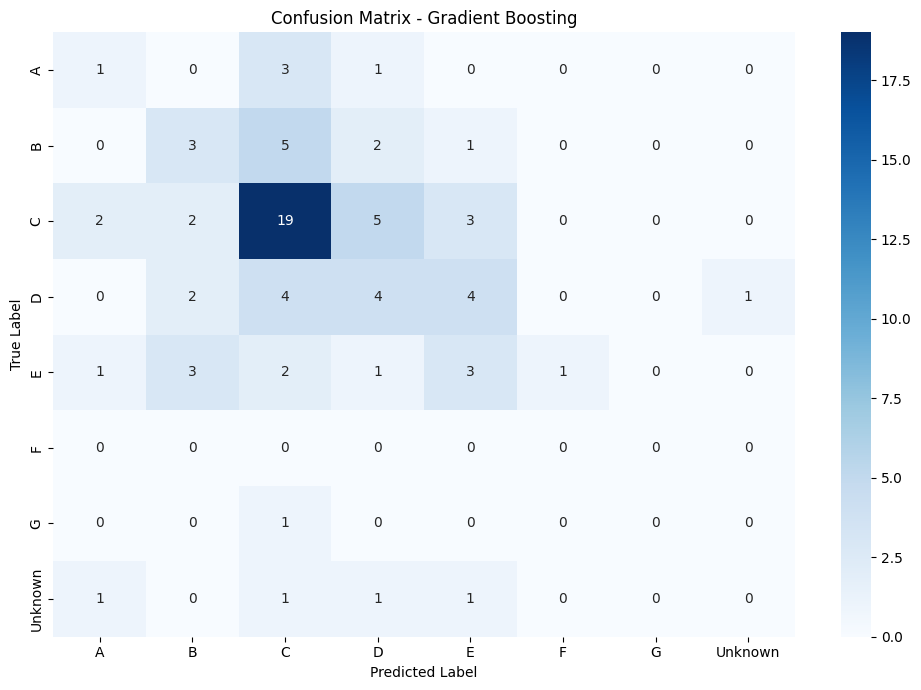


--- Training Logistic Regression ---


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\U

Accuracy: 0.4359
RMSE: 1.5566

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00        11
           C       0.44      0.90      0.60        31
           D       1.00      0.07      0.12        15
           E       0.36      0.45      0.40        11
           G       0.00      0.00      0.00         1
     Unknown       0.00      0.00      0.00         4

    accuracy                           0.44        78
   macro avg       0.26      0.20      0.16        78
weighted avg       0.42      0.44      0.32        78



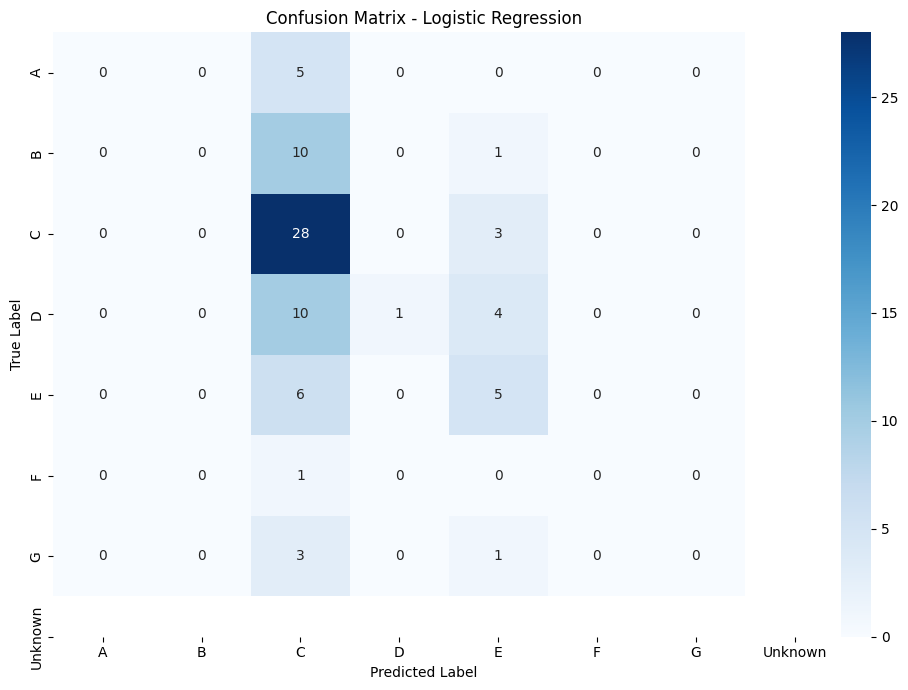


--- Training SVM ---
Accuracy: 0.3974
RMSE: 1.6251

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00        11
           C       0.40      1.00      0.57        31
           D       0.00      0.00      0.00        15
           E       0.00      0.00      0.00        11
           G       0.00      0.00      0.00         1
     Unknown       0.00      0.00      0.00         4

    accuracy                           0.40        78
   macro avg       0.06      0.14      0.08        78
weighted avg       0.16      0.40      0.23        78



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

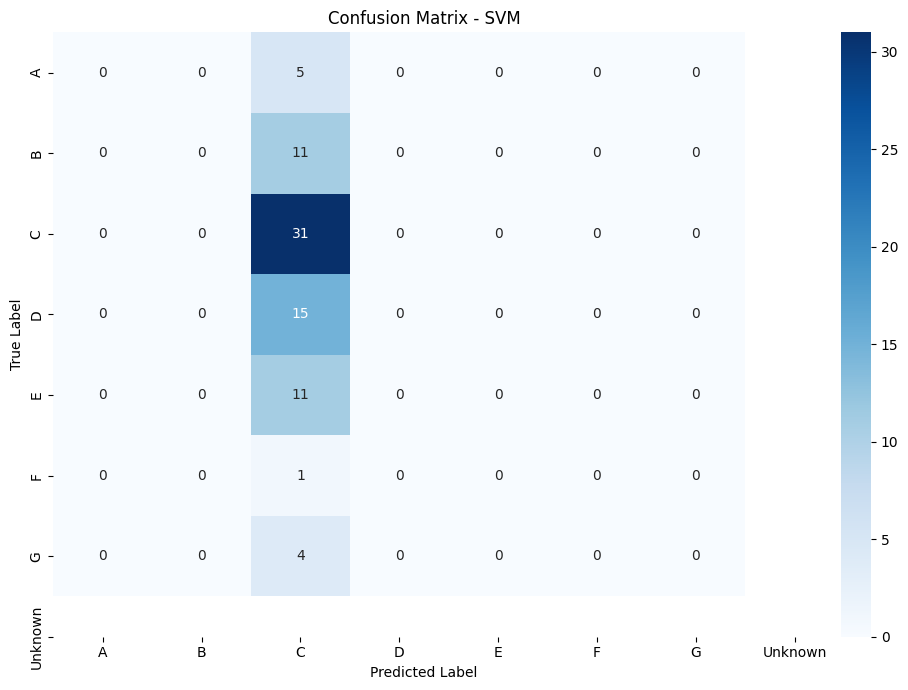


--- Training KNN ---
Accuracy: 0.3846
RMSE: 1.7650

Classification Report:
              precision    recall  f1-score   support

           A       0.22      0.40      0.29         5
           B       0.23      0.27      0.25        11
           C       0.50      0.74      0.60        31
           D       0.25      0.07      0.11        15
           E       0.17      0.09      0.12        11
           G       0.00      0.00      0.00         1
     Unknown       0.00      0.00      0.00         4

    accuracy                           0.38        78
   macro avg       0.20      0.22      0.19        78
weighted avg       0.32      0.38      0.33        78



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

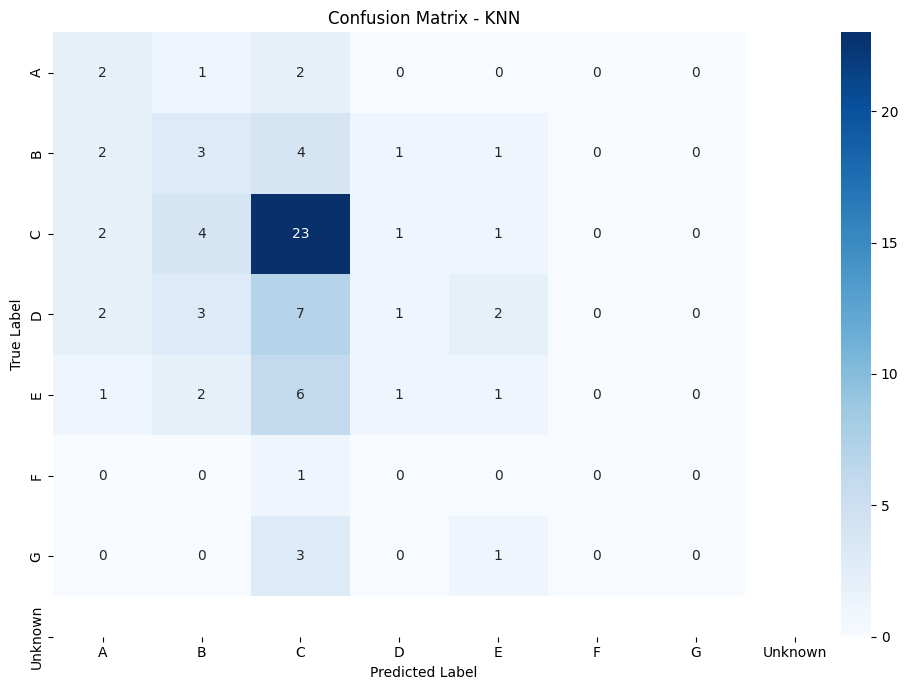

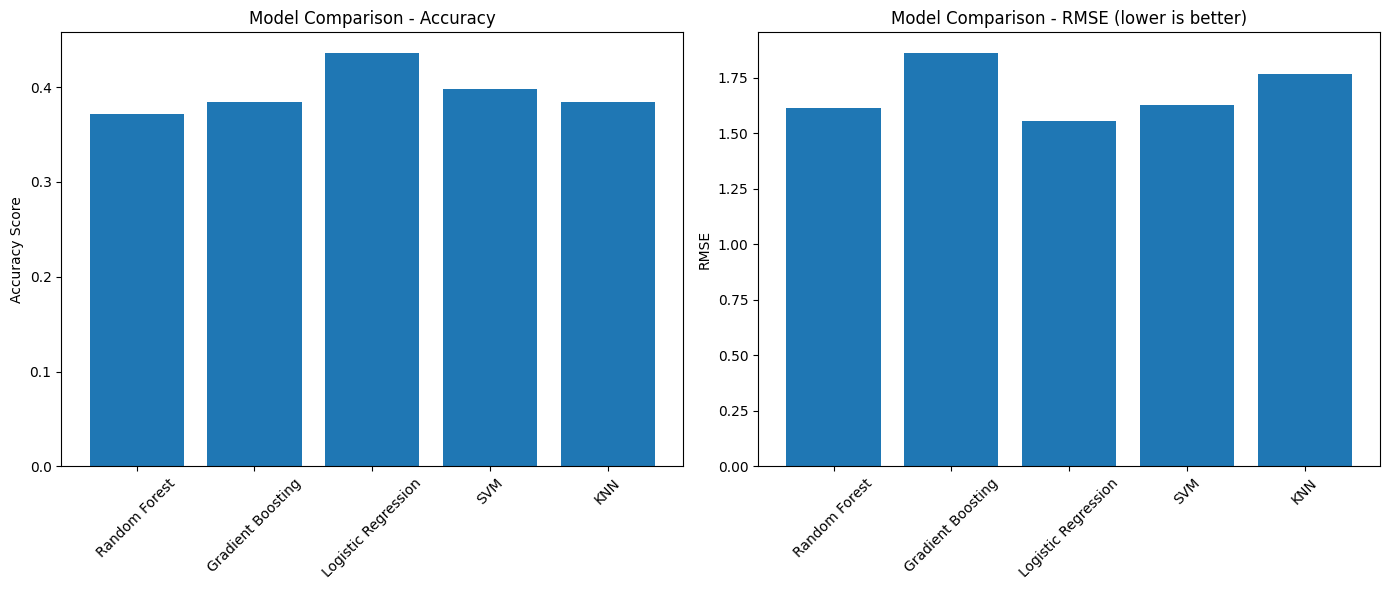


Best model by accuracy: Logistic Regression with accuracy 0.4359
Best model by RMSE: Logistic Regression with RMSE 1.5566


In [212]:
# First, encode the target variable for RMSE calculation
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Results storage
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # For RMSE, we need numeric predictions
    y_pred_encoded = label_encoder.transform(y_pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'rmse': rmse,
        'predictions': y_pred
    }
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_encoder.classes_, 
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Compare models
accuracy_scores = {name: results[name]['accuracy'] for name in results}
rmse_scores = {name: results[name]['rmse'] for name in results}

# Plot comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.title('Model Comparison - RMSE (lower is better)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Find the best model
best_accuracy_model = max(results.items(), key=lambda x: x[1]['accuracy'])
best_rmse_model = min(results.items(), key=lambda x: x[1]['rmse'])

print(f"\nBest model by accuracy: {best_accuracy_model[0]} with accuracy {best_accuracy_model[1]['accuracy']:.4f}")
print(f"Best model by RMSE: {best_rmse_model[0]} with RMSE {best_rmse_model[1]['rmse']:.4f}")

# Feature importance for the best model (if available)
best_model = best_accuracy_model[1]['model']

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15 features
    
    plt.figure(figsize=(10, 8))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()